<a href="https://colab.research.google.com/github/tayfununal/Normalizing-Flows/blob/main/eulerverlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(39)

def symplectic_euler(h=0.005):

    t = np.arange(0, 2*np.pi, h)

    q = np.zeros(t.shape[0] )
    p = np.zeros(t.shape[0] )

    q[0] = 0
    p[0] = 1
    
    for i in range(0, t.shape[0]-1):
      q[i + 1] = (1-h**2) * q[i] + h * p[i]
      p[i + 1] = p[i] - h * q[i]

    return q, p, t

p , q, t = symplectic_euler()
print("q değerleri:\n", q ,"\np değerleri:\n", p, "\nt değerleri:\n", t)

q değerleri:
 [1.         1.         0.999975   ... 0.99988022 0.99994611 0.999987  ] 
p değerleri:
 [ 0.          0.005       0.00999988 ... -0.01317844 -0.00817871
 -0.00317877] 
t değerleri:
 [0.000e+00 5.000e-03 1.000e-02 ... 6.270e+00 6.275e+00 6.280e+00]


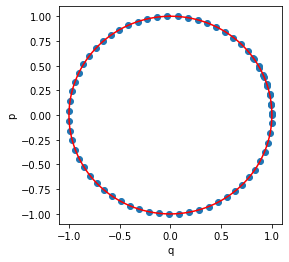

In [244]:
plt.figure(figsize = (4, 4))
plt.plot(p[:, ], q[:,], c = "red")
plt.xlabel('q')
plt.ylabel('p')

t_true=np.arange(0,7,0.1)
x=np.cos(t_true)
y=np.sin(t_true)
plt.scatter(x,y)
plt.show()

In [245]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

In [246]:
inp = Input(shape=(1,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model = Model(inputs=inp, outputs=out)

In [247]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_48 (Dense)            (None, 64)                128       
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [248]:
def H(z):
  return tf.reduce_sum((z**2)/2,axis=1)


def custom_loss(y_true, y_pred):
  return tf.keras.losses.MSE(y_true, y_pred) + (0.5 - (1/16) * H(y_pred))**2


In [249]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt , loss=custom_loss)
model.fit(t, np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1), epochs=200, batch_size=16)

Epoch 1/200
79/79 [==============================] - 1s 2ms/step - loss: 0.4831
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2207
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2213
Epoch 8/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 9/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 10/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 11/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 12/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2186
Epoch 13/200
79/79 [=================

In [250]:
def z(t, z_0):
  y = z_0 + t.reshape(-1,1) * model(t).numpy()
  return y

In [251]:
sonuc = z(t=t, z_0 = np.array([1, 0]))

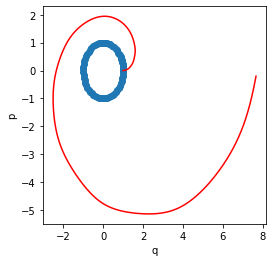

In [252]:
plt.figure(figsize = (4, 4))
plt.plot(sonuc[:,0], sonuc[:,1], c = "red")
plt.xlabel('q')
plt.ylabel('p')

t_true=np.arange(0,7,0.1)
x=np.cos(t_true)
y=np.sin(t_true)
plt.scatter(x,y)
plt.show()

In [253]:
#verlet
import math
import numpy as np

def verlet(h = 0.5, num_steps = 10):
  
  pv = np.zeros(num_steps + 1)
  qv = np.zeros(num_steps + 1)

  pv[0] = 0
  qv[0] = 1
  
  for i in range(0 ,num_steps):
    ara_p = pv[i] - h/2 * qv[i]

    qv[i+1] = qv[i] + h * (pv[i] - h/2 * qv[i])

    pv[i+1] = ara_p - h/2 * (qv[i] + h * (pv[i] - h/2 * qv[i]))

  return pv,qv

pv, qv = verlet()
print("p", pv ,"\nq", qv)

p [ 0.         -0.46875    -0.8203125  -0.96679688 -0.87158203 -0.55847168
 -0.10574341  0.37342072  0.75922966  0.95523119  0.91242492] 
q [ 1.          0.875       0.53125     0.0546875  -0.43554688 -0.81689453
 -0.99401855 -0.92263794 -0.62059784 -0.16340828  0.33463335]


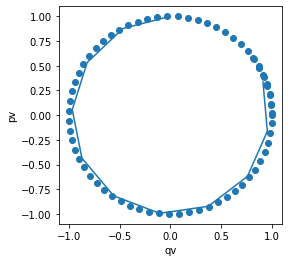

In [254]:
plt.figure(figsize = (4, 4))
plt.plot(pv[:, ], qv[:,])
plt.xlabel('qv')
plt.ylabel('pv')
t=np.arange(0,7,0.1)
x=np.cos(t)
y=np.sin(t)
plt.scatter(x,y)
plt.show()
      

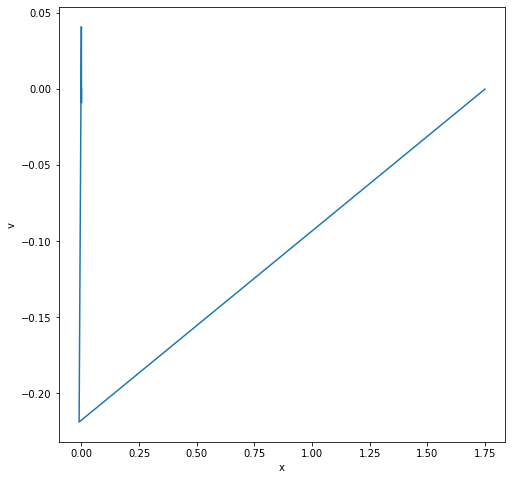

In [255]:
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
h=0.5
  
t = np.linspace(0,100,N)
dt = t[1]-t[0]


pv1 = np.zeros(N)
qv1 = np.zeros(N)
pv1[0] = 2 + 0.25 * math.cos(math.pi)
qv1[0] = 2 * math.sin(math.pi)

for i in range(N-1):
    
    pv1[(i+1)//2] = pv1[i] - h*qv1[i]/2
    qv1[i+1] = qv1[i] + h*(pv1[i] - h*qv1[i]/2)
    qv1[i+1] = pv1[i+1]/2 - h/2*(qv1[i] + h*(pv1[i] - h/2*qv1[i]))

plt.figure(figsize = (8, 8))
plt.plot(pv1[:, ], qv1[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()


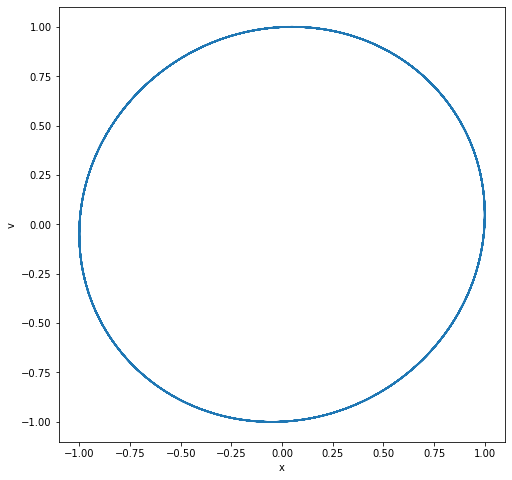

 [ 1.          0.98997997  0.97004031  0.94038082  0.90129868  0.85318551
  0.79652339  0.73188008  0.65990331  0.58131429  0.49690048  0.40750772
  0.31403171  0.2174091   0.11860804  0.01861853 -0.08155754 -0.1809164
 -0.27846248 -0.37321835 -0.46423456 -0.55059913 -0.63144668 -0.70596711
 -0.77341374 -0.83311073 -0.88445993 -0.92694681 -0.96014566 -0.98372382
 -0.99744504 -1.00117183 -0.99486685 -0.97859327 -0.95251416 -0.91689083
 -0.87208022 -0.81853134 -0.75678076 -0.68744721 -0.61122542 -0.52887913
 -0.44123345 -0.3491666  -0.2536011  -0.1554945  -0.05582984  0.04439423
  0.14417347  0.24250809  0.33841277  0.43092655  0.51912243  0.60211668
  0.67907771  0.74923436  0.81188366  0.86639786  0.91223073  0.94892301
  0.97610706  0.99351049  1.00095892  0.9983777   0.98579271  0.96333005
  0.93121479  0.88976874  0.83940717  0.78063472  0.71404028  0.64029114
  0.56012626  0.4743489   0.38381855  0.28944233  0.19216589  0.09296394
 -0.00716952 -0.10723113 -0.20621829 -0.30313913 -0

In [256]:
#leapfrog
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]


x = np.zeros(N)
v = np.zeros(N)
x[0] = x0
v[0] = 0
for i in range(N-1):
    
  v[i+1] = v[i] + (-w**2) * x[i] * dt
  x[i+1] = v[i+1] * dt + x[i]


plt.figure(figsize = (8, 8))
plt.plot(x[:, ], v[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()
print("", x ,"", v)

In [257]:
import numpy as np
k = 1
N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]

x1 = np.zeros(N)
v1 = np.zeros(N)
x1[0] = x0
v1[0] = 0
def leapfrog() :
  for i in range (N-1) :
    v1[i+1] = v1[i] + (-w**2) * x1[i] * dt
    x1[i+1] = v1[i+1] + dt * x1[i]

    return v1,x1

leapfrog()




(array([ 0.       , -0.1001001,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0. 